# E-Commerce: Product Range Analysis

# Project goal:
Analysis of product range of home appliances online store in order to identify trending items by analyzing top-selling products and the revenue they bring. Additionally, the goal is to identify products “from the lowest shelf” with low sales and profitability, in order to maximize profitability and effectiveness. Identify products which have high potential to increase revenue. Based on the analysis, the management will make decisions regarding marketing strategy to boost sales and profit from the top-selling products and possibly modify the product range by cutting the low selling products.

### Basket analysis

#### Average basket size by price and by number of items

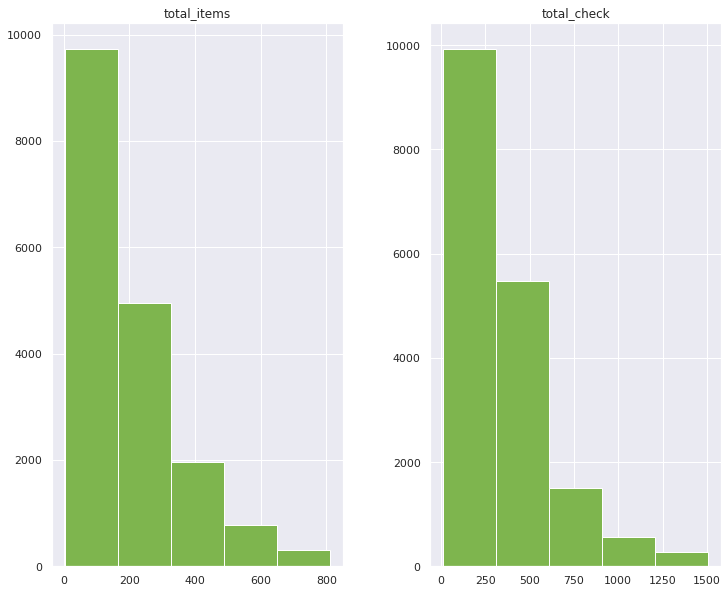

In [196]:
#average basket size
total_purchase_no_outliers.hist(column=['total_items', 'total_check'], color=c, figsize=(12,10), bins=5);

In [197]:
#average basket size
total_purchase_no_outliers.agg({'total_items': 'mean', 'total_check': 'mean'}).reset_index()

,index,0
0,total_items,190.751368
1,total_check,342.652218


Average number of items in the basket is 191.  
Average total check per purchase is 342.7.  
Most baskets have up to 350 items.  
Most total checks per basket are up to 600.

#### Products that are often sold together

##### Apriori

We will perform basket analysis and the also find most freaquet bundles - items that are often sold together.  
For basket analysis we will apply **APRIORI algorithm**:
The first component of the Apriori algorithm is support – we use it to assess the overall popularity of a given product with the following formula:    

**Support(item)** = Transactions comprising the item / Total transactions
It is a percentage of purchases the item is present in. A high support value indicates that the item is present in most purchases, therefore marketers should focus on it more.  

**Confidence** tells us the likelihood of different purchase combinations. We calculate that using the following formula:
Confidence = Transactions comprising tem1 and item2/ Transactions comprising item 1.
Confidence 0.75 means that 75% of the customers who bought the item also purchased other specific item.  

**Lift** refers to the increase in the ratio of the sale of milk when you sell bread:
Lift = Confidence/Support= 0.75/1 = 1.3 - means that customers are 1.3 times more likely to buy other specific item if you also sell firth item.

In [198]:
#we will use purchases with positive values
items_for_apriori = ecomm_clean.query('quantity > 0 and total > 0')
items_for_apriori['description'].nunique()

3977

In [199]:
basket = (items_for_apriori
          .groupby(['invoice_no', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))

In [200]:
basket

description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube posy,12 pencils tall tube red retrospot,12 pencils tall tube skulls,12 pencils tall tube woodland,12 pink hen+chicks in basket,12 pink rose peg place settings,12 red rose peg place settings,15 pink fluffy chicks in box,15cm christmas glass ball 20 lights,16 pc cutlery set pantry design,16 piece cutlery set pantry design,18pc wooden cutlery set disposable,2 daisies hair comb,2 picture book eggs easter bunny,2 picture book eggs easter chicks,2 picture book eggs easter ducks,20 dolly pegs retrospot,200 bendy skull straws,200 red + white bendy straws,3 birds canvas screen,3 black cats w hearts blank card,3 drawer antique white wood cabinet,3 gardenia morris boxed candles,3 hearts hanging decoration rustic,3 hook hanger magic garden,...,yellow giant garden thermometer,yellow metal chicken heart,yellow pink flower design big bowl,yellow pot plant candle,yellow shark helicopter,yellow/blue retro radio,yellow/orange flower design plate,yellow/pink ceramic candle holder,yellow/pink flower design big mug,you're confusing me metal sign,yuletide images gift wrap set,yuletide images s/6 paper boxes,zinc heart t-light holder,zinc star t-light holder,zinc box sign home,zinc finish 15cm planter pots,zinc folkart sleigh bells,zinc heart flower t-light holder,zinc heart lattice 2 wall planter,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc hearts plant pot holder,zinc herb garden container,zinc metal heart decoration,zinc plant pot holder,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoice_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

The resulting table tells us how many times each item has been purchased in one transaction. There are about 4,000 columns while most people only shop for about 200 items, which is why this table is sparse and mostly comprised of zeroes. The final data pre-processing step involves encoding all values in the above data frame to 0 and 1.

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

In [201]:
def encode_units(x):
    """
    The function will assign 0 to all values which are less or equal to 0 and 1 to all values 
    which are more or equal to 1.
    """
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [202]:
basket_sets

description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,12 pencils tall tube posy,12 pencils tall tube red retrospot,12 pencils tall tube skulls,12 pencils tall tube woodland,12 pink hen+chicks in basket,12 pink rose peg place settings,12 red rose peg place settings,15 pink fluffy chicks in box,15cm christmas glass ball 20 lights,16 pc cutlery set pantry design,16 piece cutlery set pantry design,18pc wooden cutlery set disposable,2 daisies hair comb,2 picture book eggs easter bunny,2 picture book eggs easter chicks,2 picture book eggs easter ducks,20 dolly pegs retrospot,200 bendy skull straws,200 red + white bendy straws,3 birds canvas screen,3 black cats w hearts blank card,3 drawer antique white wood cabinet,3 gardenia morris boxed candles,3 hearts hanging decoration rustic,3 hook hanger magic garden,...,yellow giant garden thermometer,yellow metal chicken heart,yellow pink flower design big bowl,yellow pot plant candle,yellow shark helicopter,yellow/blue retro radio,yellow/orange flower design plate,yellow/pink ceramic candle holder,yellow/pink flower design big mug,you're confusing me metal sign,yuletide images gift wrap set,yuletide images s/6 paper boxes,zinc heart t-light holder,zinc star t-light holder,zinc box sign home,zinc finish 15cm planter pots,zinc folkart sleigh bells,zinc heart flower t-light holder,zinc heart lattice 2 wall planter,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc hearts plant pot holder,zinc herb garden container,zinc metal heart decoration,zinc plant pot holder,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoice_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [203]:
frequent_itemsets = apriori(basket_sets, min_support=0.04, use_colnames=True)

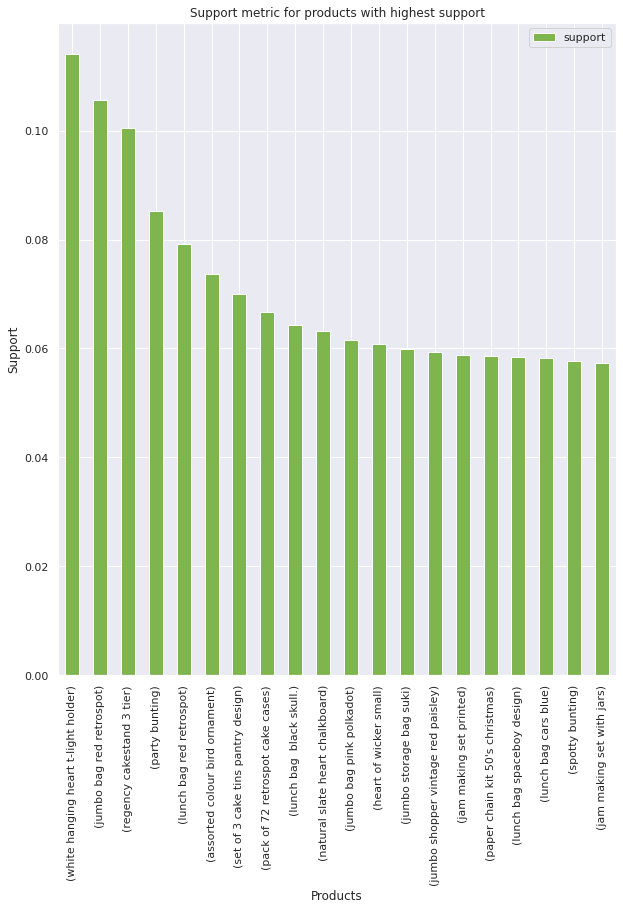

In [204]:
frequent_itemsets.sort_values(by='support',ascending=False).head(20).plot(kind='bar', x='itemsets', color=c, figsize=(10,12))
plt.title('Support metric for products with highest support')
plt.ylabel('Support')
plt.xlabel('Products');

- white hanging heart t-light holde presents in 11% of the purchaes.  
- jumbo bag red retrospot presents in 10.5% of the purchases.
- regency cakestand 3 tier presents in 10% of the purchases.

In [205]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(jumbo bag red retrospot),(jumbo bag pink polkadot),0.105633,0.061590,0.041717,0.394926,6.412194,0.035211,1.550901
1,(jumbo bag pink polkadot),(jumbo bag red retrospot),0.061590,0.105633,0.041717,0.677340,6.412194,0.035211,2.771855


Jumbo bag pink polkadot and jumbo bag red retrospot are often purchased together.
We tried running the algorithm with lower threshold, setting support to 0.03 and 0.02 to get larger number of combinations, however, kernel kept dying off due to receiving too many combinations. Therefore, we will use another approach.

##### Bundles analysis

In [206]:
bundles = items_for_apriori[items_for_apriori['invoice_no'].duplicated(keep=False)]
bundles['product_bundle'] = bundles.groupby(['invoice_no'])['description'].transform(lambda x: ','.join(x))
bundles = bundles[['invoice_no', 'product_bundle']].drop_duplicates().reset_index(drop=True)
bundles.head()

,invoice_no,product_bundle
0,536370,"inflatable political globe,set/2 red retrospot tea towels,panda and bunnies sticker sheet,red toadstool led night light,vintage heads and tails card game,stars gift tape,vintage seaside jigsaw puzzles,round..."
1,536382,"inflatable political globe,chocolate calculator,vintage snakes & ladders,recycling bag retrospot,toy tidy pink polkadot,jumbo shopper vintage red paisley,alarm clock bakelike green,set 3 wicker oval baskets..."
2,536756,"inflatable political globe,ivy heart wreath,red white scarf hot water bottle,key fob , front door,paper chain kit 50's christmas,small popcorn holder,mobile vintage hearts,6 rocket balloons,soap dish broc..."
3,536863,"inflatable political globe,doggy rubber,hearts wrapping tape,sleeping cat erasers,lunch bag red retrospot,lunch bag black skull.,blue paisley journal,strawberry bath sponge,apple bath sponge,blue calculato..."
4,536865,"inflatable political globe,edwardian parasol black,porcelain butterfly oil burner,blue polkadot passport cover,queen of skies luggage tag,edwardian parasol red,pink polkadot childrens umbrella,red retrospot..."


In [207]:
count = Counter()

for row in bundles['product_bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(100)

[(('jumbo bag pink polkadot', 'jumbo bag red retrospot'), 859),
 (('green regency teacup and saucer', 'roses regency teacup and saucer'), 783),
 (('key fob ', 'key fob '), 779),
 (('jumbo storage bag suki', 'jumbo bag red retrospot'), 742),
 (('jumbo shopper vintage red paisley', 'jumbo bag red retrospot'), 689),
 (('lunch bag red retrospot', 'lunch bag  black skull.'), 674),
 (('alarm clock bakelike green', 'alarm clock bakelike red'), 660),
 (('green regency teacup and saucer', 'pink regency teacup and saucer'), 644),
 (('lunch bag red retrospot', 'lunch bag pink polkadot'), 629),
 (('key fob ', ' back door'), 623),
 (('pink regency teacup and saucer', 'roses regency teacup and saucer'), 608),
 (('jumbo bag red retrospot', 'jumbo  bag baroque black white'), 602),
 (('lunch bag red retrospot', 'jumbo bag red retrospot'), 594),
 (('key fob ', ' front  door'), 590),
 (("paper chain kit 50's christmas", 'paper chain kit vintage christmas'),
  580),
 (('lunch bag red retrospot', 'lunch ba

As we can learn from the 100 most common combinations, buyers often purchase same items of different colors and patterns. This is aligned with the conclusion regarding the seasonal sales by month. Small gifts are usually purchased before holidyas in large numbers, and if purchased for a number of people, it's only logical these would be same items in variety of colors. Additionally, buyers purchase party decorations, which also bought in one purchase in different patterns and colors. 
Home appliences, like storage solutions, as also bought as identical items in variety of sizes, or for example, lunch bags and boxes for all family members maybe purchased in different colors. 
As to the hypothesis that trending products from the same product category are often sold together in one purchase - based on the bundle analysis above the hypothesis has been proven: buyers often purchase same items of different colors and patterns or items from the same catergory together.    

**For example:**
- paper chain kit 50's christmas and paper chain kit vintage christmas - 583 purchases  
- regency cakestand 3 tier and roses regency teacup and saucer - 550 purchases 
- jumbo bag pink polkadot and jumbo bag red retrospot - 867 purchases 
- pack of 72 retrospot cake cases and 60 teatime fairy cake cases - 478 purchases
- coffee and sugar - 446 purchases
- wooden heart christmas scandinavian and wooden star christmas scandinavian - 428 purchases
- recipe box pantry yellow design and set of 3 cake tins pantry design - 407 purchases

### Seasonality

#### Top-ten most selling products for EACH MONTH

In [208]:
def monthly_top_sales(month):
    month_sales = ecomm_clean[ecomm_clean.invoice_month == month]
    print('Top items sold for', month)
    print(month_sales.groupby(['description'])['quantity'].sum().sort_values(ascending=False).head(10).reset_index())
    print('----------------------------')
    print(month_sales.groupby(['description'])['total'].sum().sort_values(ascending=False).head(10).reset_index())

In [209]:
for i in ecomm_clean.invoice_month.unique():
    monthly_top_sales(i)
    print('-----------------------------')
    print('-----------------------------')

Top items sold for 2018-11-01T00:00:00.000000000
                          description  quantity
0   world war 2 gliders asstd designs      3264
1      assorted colour t-light holder      1842
2               red  harmonica in box      1549
3  white hanging heart t-light holder       763
4       assorted colour bird ornament       727
5     pack of 72 retrospot cake cases       700
6      red woolly hottie white heart.       686
7           pack of 12 london tissues       656
8            black record cover frame       613
9             jumbo bag red retrospot       604
----------------------------
                          description    total
0            regency cakestand 3 tier  3492.84
1      red woolly hottie white heart.  2132.88
2            black record cover frame  2078.43
3  white hanging heart t-light holder  2027.73
4        set 7 babushka nesting boxes  1853.00
5               red  harmonica in box  1676.55
6                       chilli lights  1353.15
7      paper chain

We will ignore data on Nov 2018 and Dec 2019 as the data for these months is incomplete.
Top products for each month in terms of number of items sold and rvevenue: 

- In December the buyers choose hand warmed, t-light holders, popcord holders, X-mas presents and cards, tissues, hot water bottles, cake-cases, and X-mas decorations - mostly small gifts and winter atmosphere accessories. They sit at home, drink tea, watch movies, eat popcorn, and make cakes.
- In January the buyers choose mostly t-light holders and baking accessories. They tend to create warm cozy atmosphere and bake. 
- In February the buyers choose mostly popcorn holders, tissues, essensial balm, baking accessories, paint sets. They tend to create warm cozy atmosphere and bake. Also, there maybe flue going around. Mostly indoor activities.  
- In March the buyers choose mostly baking accessories, bags, tissues, popcorn holders, paint sets, party decorations, t-light holders, bags.
- In April the buyers choose mostly small gifts, t-light holders, baking accessories, bags, party and home decorations.
- In May the buyers choose mostly popcorn holders, small gifts, t-light holders, baking accessories, party decorations, picnic and outdoor party supplies.
- In June the buyers choose mostly bags, tissues, baking accessories, party decorations, t-light holders, picnic sets. - supplies for outdoor parties and picnics.
- In July the buyers choose small gifts, bags, essensial balm, t-light holders, party decodrations, baking accessories. 
- In August the buyers choose party and home decorations, bags, popcorn holders, paint sets, tissues, baking accessories.
- In September the buyers choose  bags, popcorn holders, party and home decorations, baking accessories, and hot water buttles. It's getting colder outside. 
- In October the buyers choose night light, small gifts, popcorn holders, t-light holders, bags, baking accessories, and hot water buttles. It's getting colder outside. 
- In November the buyers choose X-mas decoration and party decorations, night lights, X-mass themed small gifts, popcorn holders, t-light holders, bags, baking accessories, and hot water buttles. X-mas is coming up.

#### Average basket size (number of items and total revenue) for each month


To calculate average metrics, we will use data without outliers.

In [210]:
monthly_avg_purchase = total_purchase_no_outliers.groupby(['month']).agg({'invoice': 'count', 'total_items': 'sum', 'total_check': 'sum'}).reset_index()
monthly_avg_purchase.columns = ['month', 'buyers', 'number_of_items', 'revenue']
monthly_avg_purchase

,month,buyers,number_of_items,revenue
0,2018-11-01,240,32379,63915.450
1,2018-12-01,1111,169471,349767.690
2,2019-01-01,1061,200009,369129.950
3,2019-02-01,962,174773,344864.610
4,2019-03-01,1265,229557,430044.300
5,2019-04-01,1074,194270,358318.360
6,2019-05-01,1596,287818,561125.650
7,2019-06-01,1344,250501,446502.090
8,2019-07-01,1323,260115,439111.801
9,2019-08-01,1250,259826,443104.210


In [211]:
monthly_avg_purchase['average_items_in_basket'] = monthly_avg_purchase['number_of_items']/monthly_avg_purchase['buyers']
monthly_avg_purchase['average_total_basket'] = monthly_avg_purchase['revenue']/monthly_avg_purchase['buyers']
monthly_avg_purchase

,month,buyers,number_of_items,revenue,average_items_in_basket,average_total_basket
0,2018-11-01,240,32379,63915.450,134.912500,266.314375
1,2018-12-01,1111,169471,349767.690,152.539154,314.822403
2,2019-01-01,1061,200009,369129.950,188.509896,347.907587
3,2019-02-01,962,174773,344864.610,181.676715,358.487121
4,2019-03-01,1265,229557,430044.300,181.467984,339.955968
5,2019-04-01,1074,194270,358318.360,180.884544,333.629758
6,2019-05-01,1596,287818,561125.650,180.337093,351.582487
7,2019-06-01,1344,250501,446502.090,186.384673,332.218817
8,2019-07-01,1323,260115,439111.801,196.609977,331.906123
9,2019-08-01,1250,259826,443104.210,207.860800,354.483368


In [212]:
monthly_avg_purchase = monthly_avg_purchase.query('"2018-11-01" < month < "2019-12-01"')
monthly_avg_purchase

,month,buyers,number_of_items,revenue,average_items_in_basket,average_total_basket
1,2018-12-01,1111,169471,349767.690,152.539154,314.822403
2,2019-01-01,1061,200009,369129.950,188.509896,347.907587
3,2019-02-01,962,174773,344864.610,181.676715,358.487121
4,2019-03-01,1265,229557,430044.300,181.467984,339.955968
5,2019-04-01,1074,194270,358318.360,180.884544,333.629758
6,2019-05-01,1596,287818,561125.650,180.337093,351.582487
7,2019-06-01,1344,250501,446502.090,186.384673,332.218817
8,2019-07-01,1323,260115,439111.801,196.609977,331.906123
9,2019-08-01,1250,259826,443104.210,207.860800,354.483368
10,2019-09-01,1525,333728,578456.791,218.838033,379.315929


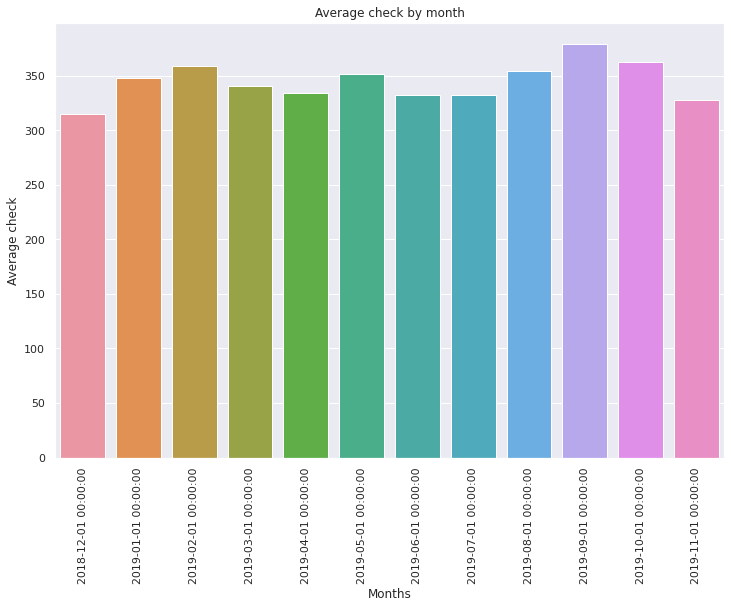

In [213]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='month', y='average_total_basket', data=monthly_avg_purchase)
ax.set_xticklabels(monthly_avg_purchase.month,rotation=90)
plt.title('Average check by month')
plt.ylabel('Average check')
plt.xlabel('Months');

**Average check by month**  

September is the month with the highest average check, with, February, October, and August right behind. December is the month with the lowest average check.

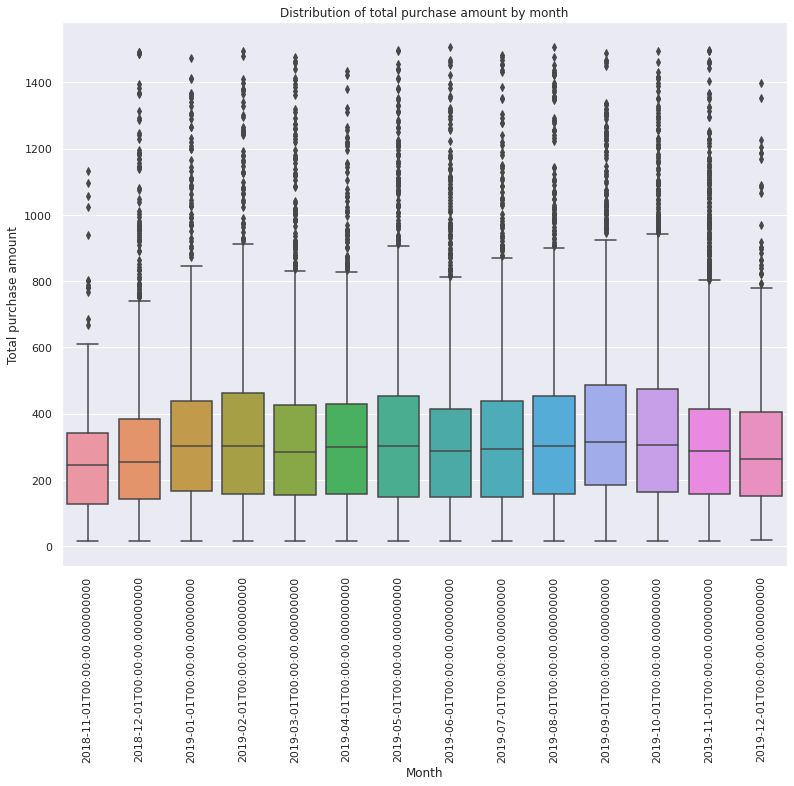

In [214]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='month', y='total_check', data=total_purchase_no_outliers)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Distribution of total purchase amount by month')
plt.ylabel('Total purchase amount')
plt.xlabel('Month');

December is the month the lowest total purchase amount. Although there's no significant difference between the medians of amount spent per purchase for other month, in February, May, September, and October more buyers tend to spend more on each purchase.

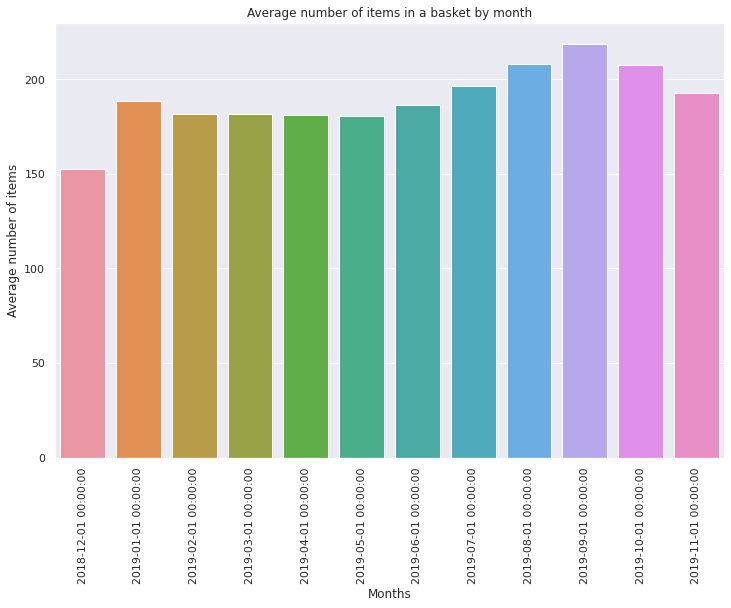

In [215]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='month', y='average_items_in_basket', data=monthly_avg_purchase)
ax.set_xticklabels(monthly_avg_purchase.month,rotation=90)
plt.title('Average number of items in a basket by month')
plt.ylabel('Average number of items')
plt.xlabel('Months');

**Average number of items in the basket by month**  

August, September, and October are the month with largest number or items per purchase on average. During these months buyers tend to buy more items on average. In December buyers tend to buy less items on average. This is interesting as one could have thought that due to November sales (Black Friday, X-mass gifts) buyers would be buying more during these months.

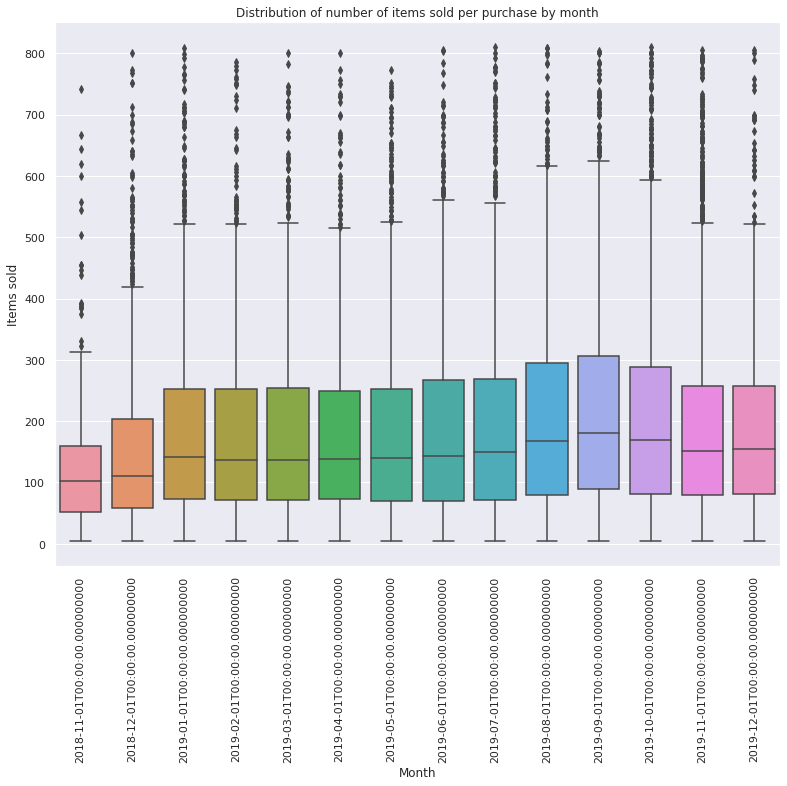

In [216]:
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='month', y='total_items', data=total_purchase_no_outliers)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Distribution of number of items sold per purchase by month')
plt.ylabel('Items sold')
plt.xlabel('Month');

December is the month the lowest number of items per purchase on average, however, there're many outliers - there're many buyers who buy more items than average. In August, September, and October more buyers tend to buy more items in each purchase.

#### Seasonal purchases

In [217]:
season_items = ecomm_clean.groupby(['season', 'invoice_no'])['quantity'].sum().reset_index()
season_items.columns = ['season', 'invoice', 'total_items']

season_check = ecomm_clean.groupby(['season', 'invoice_no'])['total'].sum().reset_index()
season_check.columns = ['season', 'invoice', 'total_check']

season_purchase = pd.merge(season_items, season_check, how='left', on=['season', 'invoice'])
season_purchase.head()

,season,invoice,total_items,total_check
0,fall,536365,40,139.12
1,fall,536366,12,22.20
2,fall,536367,83,278.73
3,fall,536368,15,70.05
4,fall,536369,3,17.85


In [218]:
season_purchase_no_outliers = season_purchase.query('4 <= total_items <= 810 and 14.2 <= total_check <= 1508')
season_purchase_no_outliers.head()

,season,invoice,total_items,total_check
0,fall,536365,40,139.12
1,fall,536366,12,22.20
2,fall,536367,83,278.73
3,fall,536368,15,70.05
5,fall,536370,446,801.86


In [219]:
seasonal_avg_purchase = season_purchase_no_outliers.groupby(['season']).agg({'invoice': 'count', 'total_items': 'sum', 'total_check': 'sum'}).reset_index()
seasonal_avg_purchase.columns = ['season', 'buyers', 'number_of_items', 'revenue']

seasonal_avg_purchase['average_items_in_basket'] = seasonal_avg_purchase['number_of_items']/seasonal_avg_purchase['buyers']
seasonal_avg_purchase['average_total_basket'] = seasonal_avg_purchase['revenue']/seasonal_avg_purchase['buyers']
seasonal_avg_purchase

,season,buyers,number_of_items,revenue,average_items_in_basket,average_total_basket
0,fall,6236,1255997,2173236.151,201.410680,348.498421
1,spring,3935,711645,1349488.310,180.850064,342.944933
2,summer,3917,770442,1328718.101,196.691856,339.218305
3,winter,3645,644510,1224809.220,176.820302,336.024477


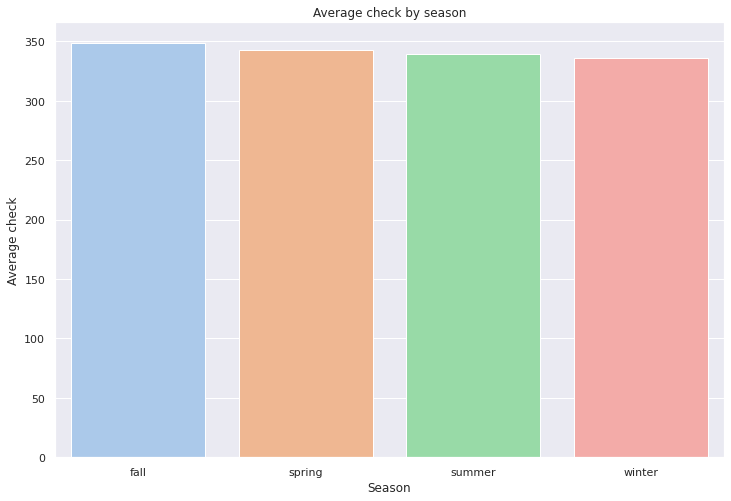

In [220]:
sns.set_palette("pastel")
plt.figure(figsize=(12,8))
ax = sns.barplot(x='season', y='average_total_basket', data=seasonal_avg_purchase)
plt.title('Average check by season')
plt.ylabel('Average check')
plt.xlabel('Season');

**Average check by season**  

Buyers tend to spend more per purchase in fall. During winter buyers spend the least per purchase. This is interesting, as one might expect that during winter months people tend to spend more time indoors, the evenings are longer, and therefore, they would spend more time online shopping. Also, X-mas gift shopping should increase the number or items and average amount spent per purchase. However, we don't see this in the data. Unless, the buyers do the X-mas shopping during Black Friday sales, as we see that november has the largest total revenue and the most items sold.

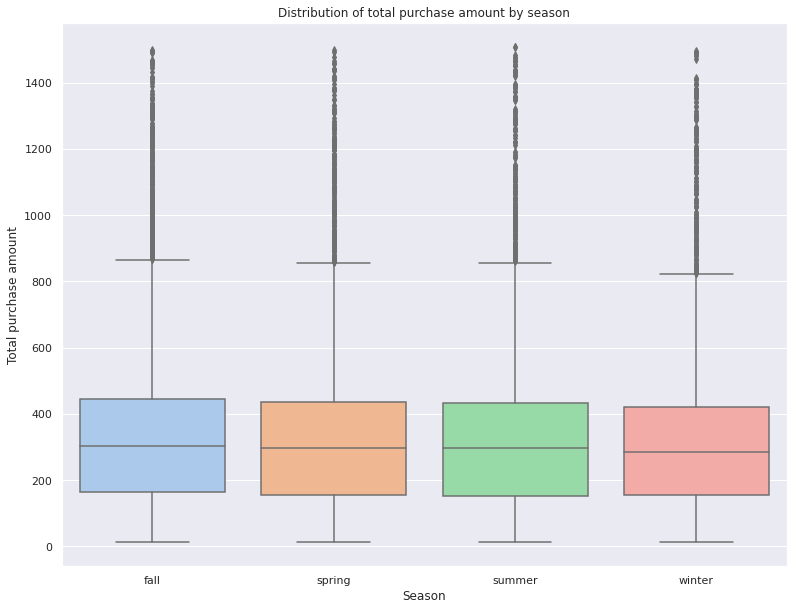

In [221]:
sns.set_palette("pastel")
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='season', y='total_check', data=season_purchase_no_outliers)
plt.title('Distribution of total purchase amount by season')
plt.ylabel('Total purchase amount')
plt.xlabel('Season');

During winter months less buyers tend to spend over the average per each purchase. In fall more buyers tend to spend more per each purchase. 

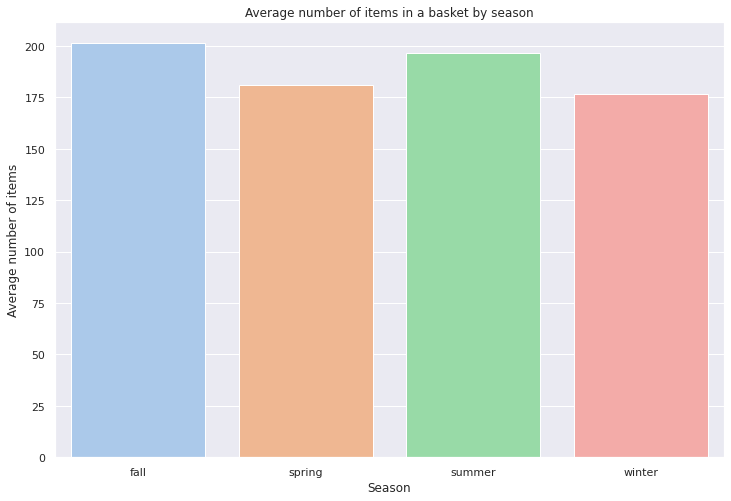

In [222]:
sns.set_palette("pastel")
plt.figure(figsize=(12,8))
ax = sns.barplot(x='season', y='average_items_in_basket', data=seasonal_avg_purchase)
plt.title('Average number of items in a basket by season')
plt.ylabel('Average number of items')
plt.xlabel('Season');

**Average number of items in a basket by season**  

During fall and summer months buyers tend to buy more items per each purchase on average. Spring and winter are the slowest seasons in terms of the average number of items per purchase.

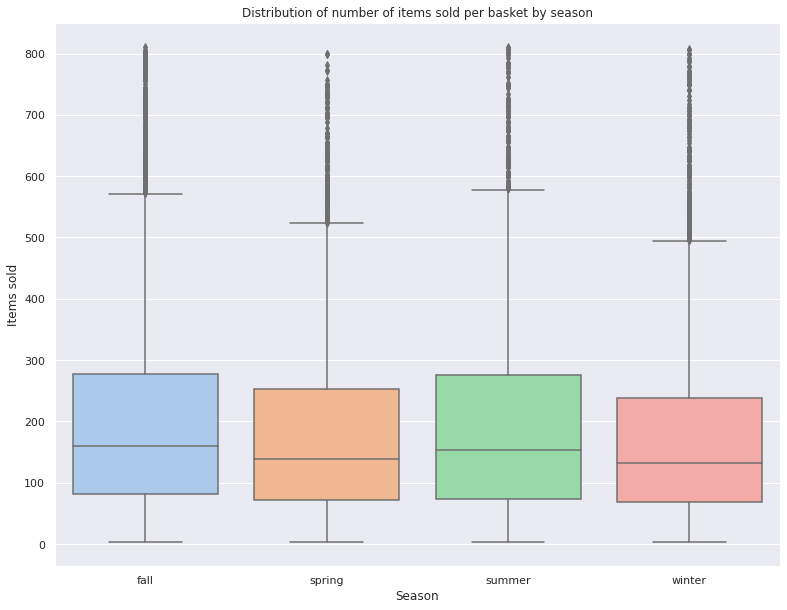

In [223]:
sns.set_palette("pastel")
plt.figure(figsize=(13,10))
ax = sns.boxplot(x='season', y='total_items', data=season_purchase_no_outliers)
plt.title('Distribution of number of items sold per basket by season')
plt.ylabel('Items sold')
plt.xlabel('Season');

During fall months and summer months more buyers tend to add more items to their baskets.

Overall, we can conclude that the hypotheses that there’s seasonality in purchasing trends: the baskets tend to be larger, more expensive and include more items right before the holidays - and the top-selling products point towards trends and customer demand in general and toward seasonal demand, in particular have been partially proven. 

1. We can see from the data that there's a seasonality in the purchasing trends. The baskets do get larger and more expensive and include more items per purchase in fall and summer, however, we don't see this in December - the month of X-mas where most of the X-mas gift shopping is expected to take place. In fact, winter is the lowest shopping season.  This maybe be possibly explained by buyers tendency to make X-mas gift shopping during Black Friday sales at the end of November.   

2. November indeed is the month with the highest number of purchases and, highest revenue and most items sold. However, the average amount spent per purchase, as well as the average number of items per purchase, is the highest during August, September, and October. In November more buyers make purchases, but they don't spend too much per purchase. This means that if more buyers make more average purchases, the more revenue will be generated.

2. In terms of top-selling products which point towards trends and customer demand in general and toward seasonal demand - from analysing top selling products by month, we could see trend and seasonlity in the items purchased: in winter buyers tend to purchase items for cozy indoor activities, X-mas gifts and decorations. In late spring and summer buyers tend to purchase suppiest for outdoor parties and activities, picnics, etc. 

## Hypotheses Testing  in the Product Range Analysis

We will be answering the question do customers purchase more items on average during certain seasons. We will compare average basket sizes - quantity and total amount spent per basket.  

**The general hypotheses are:**  
H0 – There’s no difference between the seasons in the basket size.     
H1 – There’s a difference between the seasons in the basket size.

### Statistical significance of the difference in average basket size between seasons - raw data

Let's find the statistical significance of the difference in average basket size between the seasons using the raw data.

We'll test the following hypotheses:

**Ho - null hypothesis:** There's no difference in average basket size between the seasons, when using filtered data. The average basket sizes are the same.

**H1 hypothesis:** There's a difference in average basket size between the seasons, when using filtered data. The average basket sizes are NOT the same.

To calculate the statistical significance of the difference in the segments' average basket size, we'll pass the data on the number of items and total amount per basket to the mannwhitneyu() criterion. We'll also find the relative difference in average basket size between the seasons.

In [224]:
#calculating total check per perchase by month and excluding incoices with total amount or total items less than 0
#also excluding incomplete months
total_check_season = ecomm_clean.groupby(['invoice_month', 'invoice_no', 'season']).agg({'quantity': 'sum', 'total': 'sum'}).reset_index()
total_check_season.columns = ['month', 'invoice', 'season', "total_items", 'total_check']
total_check_season_clean = total_check_season.query('total_items > 0 and total_check > 0 and "2018-11-01" < month < "2019-12-01"')
total_check_season_clean.head()

,month,invoice,season,total_items,total_check
296,2018-12-01,536847,winter,222,215.58
297,2018-12-01,536848,winter,280,534.00
298,2018-12-01,536849,winter,106,397.50
299,2018-12-01,536851,winter,360,1368.40
300,2018-12-01,536852,winter,106,71.14


In [225]:
def check_hypothesis(season_1,season_2,parameter1,parameter2,alpha=0.05):
    """
    The function will calculate two p_values based on mannwhitneyu() criterion in order to 
    to calculate the statistical significance of the difference in the seasonal average 
    basket size - one for each of the two parameters.
    It will also calculate relative difference in average basket size per parameter. 
    If p_value > alpha, it will print - rejecting the null hypothesis.
    Otherwise, it will print - Failed to reject the null hypothesis.
    Thus, it will test two hypotheses simultaniously.
    """
    p_value = (stats.mannwhitneyu(total_check_season_clean[total_check_season_clean.season == season_1][parameter1], total_check_season_clean[total_check_season_clean.season == season_2][parameter1])[1])
    p_value2 = (stats.mannwhitneyu(total_check_season_clean[total_check_season_clean.season == season_1][parameter2], total_check_season_clean[total_check_season_clean.season == season_2][parameter2])[1])

    diff_in_basket_size = total_check_season_clean[total_check_season_clean.season == season_2][parameter1].mean()/total_check_season_clean[total_check_season_clean.season == season_1][parameter1].mean()-1
    diff_in_basket_size2 = total_check_season_clean[total_check_season_clean.season == season_2][parameter2].mean()/total_check_season_clean[total_check_season_clean.season == season_1][parameter2].mean()-1
    
    print('The P-values is','{0:}'.format(p_value))
    print('The relative difference in average basket size is', '{0:.3f}'.format(diff_in_basket_size))

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", parameter1,"and seasons", season_1, 'and', season_2, ": there is a significant difference between the average basket sizes.")
    else:
        print("Failed to reject the null hypothesis for",parameter1,"and seasons", season_1,'and', season_2, ": there is no significant difference between the average basket sizes.")
    
    print('------------------------------------------')
    print('The P-values is','{0:}'.format(p_value2))
    print('The relative difference in average basket size is', '{0:.3f}'.format(diff_in_basket_size2))
    
    if (p_value2 < alpha):
        print("Rejecting the null hypothesis for", parameter2,"and seasons", season_1, 'and', season_2, ": there is a significant difference between the average basket sizes.")
    else:
        print("Failed to reject the null hypothesis for",parameter2,"and seasons", season_1,'and', season_2, ": there is no significant difference between the average basket sizes.")

In [226]:
check_hypothesis('fall','winter', 'total_items', 'total_check',alpha=0.05)

The P-values is 8.497834342146026e-25
The relative difference in average basket size is -0.047
Rejecting the null hypothesis for total_items and seasons fall and winter : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 2.1818201253391038e-06
The relative difference in average basket size is -0.019
Rejecting the null hypothesis for total_check and seasons fall and winter : there is a significant difference between the average basket sizes.


In [227]:
check_hypothesis('fall','spring','total_items', 'total_check',alpha=0.05)

The P-values is 5.029726405402876e-19
The relative difference in average basket size is -0.143
Rejecting the null hypothesis for total_items and seasons fall and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 8.211143920695414e-06
The relative difference in average basket size is -0.168
Rejecting the null hypothesis for total_check and seasons fall and spring : there is a significant difference between the average basket sizes.


In [228]:
check_hypothesis('fall','summer','total_items','total_check',alpha=0.05)

The P-values is 3.877095640349153e-05
The relative difference in average basket size is -0.036
Rejecting the null hypothesis for total_items and seasons fall and summer : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 3.3353981419006156e-06
The relative difference in average basket size is -0.082
Rejecting the null hypothesis for total_check and seasons fall and summer : there is a significant difference between the average basket sizes.


In [229]:
check_hypothesis('summer','spring','total_items','total_check',alpha=0.05)

The P-values is 3.082892160503864e-05
The relative difference in average basket size is -0.111
Rejecting the null hypothesis for total_items and seasons summer and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.819784509006547
The relative difference in average basket size is -0.094
Failed to reject the null hypothesis for total_check and seasons summer and spring : there is no significant difference between the average basket sizes.


In [230]:
check_hypothesis('summer','winter','total_items','total_check',alpha=0.05)

The P-values is 1.171115540360353e-08
The relative difference in average basket size is -0.011
Rejecting the null hypothesis for total_items and seasons summer and winter : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.7365848626224644
The relative difference in average basket size is 0.068
Failed to reject the null hypothesis for total_check and seasons summer and winter : there is no significant difference between the average basket sizes.


In [231]:
check_hypothesis('winter', 'spring', 'total_items','total_check',alpha=0.05)

The P-values is 0.05273995068878155
The relative difference in average basket size is -0.101
Failed to reject the null hypothesis for total_items and seasons winter and spring : there is no significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.5795432795398285
The relative difference in average basket size is -0.151
Failed to reject the null hypothesis for total_check and seasons winter and spring : there is no significant difference between the average basket sizes.


**In the raw data which includes outliers:**  

1. There is **a significant difference** between the average basket sizes between **fall and winter** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to winter.

2. There is **a significant difference between the average basket sizes between **fall and spring** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to spring.

3. There is **a significant difference** between the average basket sizes between **fall and summer** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to summer.

4. There is **a significant difference between the average basket sizes between **summer and spring**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket. In summer buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

5. There is **a significant difference** between the average basket sizes between **summer and winter**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket. In summer buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

6. There is **no significant difference** between the average basket sizes between **winter and spring**.

### Statistical significance of the difference in average basket size between seasons -  filtered data

Let's find the statistical significance of the difference in average basket size between the seasons using the data without outliers.

We'll test the following hypotheses:

**Ho - null hypothesis:** There's no difference in average basket size between the seasons, when using filtered data. The average basket sizes are the same.

**H1 hypothesis:** There's a difference in average basket size between the seasons, when using filtered data. The average basket sizes are NOT the same.

In [232]:
#Excluding the outliers from the table
season_check_no_outliers = total_check_season_clean.query('4 <= total_items <= 810 and 14.2 <= total_check <= 1508')
season_check_no_outliers.head()

,month,invoice,season,total_items,total_check
296,2018-12-01,536847,winter,222,215.58
297,2018-12-01,536848,winter,280,534.00
298,2018-12-01,536849,winter,106,397.50
299,2018-12-01,536851,winter,360,1368.40
300,2018-12-01,536852,winter,106,71.14


In [233]:
def check_hypothesis2(season_1,season_2,parameter1,parameter2,alpha=0.05):
    """
    The function will calculate two p_values based on mannwhitneyu() criterion in order to 
    to calculate the statistical significance of the difference in the seasonal average 
    basket size - one for each of the two parameters.
    It will also calculate relative difference in average basket size per parameter. 
    If p_value > alpha, it will print - rejecting the null hypothesis.
    Otherwise, it will print - Failed to reject the null hypothesis.
    Thus, it will test two hypotheses simultaniously.
    """
    
    p_value = (stats.mannwhitneyu(season_check_no_outliers[season_check_no_outliers.season == season_1][parameter1], season_check_no_outliers[season_check_no_outliers.season == season_2][parameter1])[1])
    p_value2 = (stats.mannwhitneyu(season_check_no_outliers[season_check_no_outliers.season == season_1][parameter2], season_check_no_outliers[season_check_no_outliers.season == season_2][parameter2])[1])

    diff_in_basket_size = season_check_no_outliers[season_check_no_outliers.season == season_2][parameter1].mean()/season_check_no_outliers[season_check_no_outliers.season == season_1][parameter1].mean()-1
    diff_in_basket_size2 = season_check_no_outliers[season_check_no_outliers.season == season_2][parameter2].mean()/season_check_no_outliers[season_check_no_outliers.season == season_1][parameter2].mean()-1
    
    print('The P-values is','{0:}'.format(p_value))
    print('The relative difference in average basket size is', '{0:.3f}'.format(diff_in_basket_size))

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", parameter1,"and seasons", season_1, 'and', season_2, ": there is a significant difference between the average basket sizes.")
    else:
        print("Failed to reject the null hypothesis for",parameter1,"and seasons", season_1,'and', season_2, ": there is no significant difference between the average basket sizes.")
    
    print('------------------------------------------')
    print('The P-values is','{0:}'.format(p_value2))
    print('The relative difference in average basket size is', '{0:.3f}'.format(diff_in_basket_size2))
    
    if (p_value2 < alpha):
        print("Rejecting the null hypothesis for", parameter2,"and seasons", season_1, 'and', season_2, ": there is a significant difference between the average basket sizes.")
    else:
        print("Failed to reject the null hypothesis for",parameter2,"and seasons", season_1,'and', season_2, ": there is no significant difference between the average basket sizes.")

In [234]:
check_hypothesis2('fall','winter','total_items','total_check',alpha=0.05)

The P-values is 2.5935514399629635e-22
The relative difference in average basket size is -0.149
Rejecting the null hypothesis for total_items and seasons fall and winter : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.0011193432514614587
The relative difference in average basket size is -0.035
Rejecting the null hypothesis for total_check and seasons fall and winter : there is a significant difference between the average basket sizes.


In [235]:
check_hypothesis2('fall','spring','total_items','total_check',alpha=0.05)

The P-values is 1.55916506804569e-13
The relative difference in average basket size is -0.114
Rejecting the null hypothesis for total_items and seasons fall and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.021939352516526928
The relative difference in average basket size is -0.025
Rejecting the null hypothesis for total_check and seasons fall and spring : there is a significant difference between the average basket sizes.


In [236]:
check_hypothesis2('fall','summer','total_items','total_check',alpha=0.05)

The P-values is 0.005102523977562509
The relative difference in average basket size is -0.036
Rejecting the null hypothesis for total_items and seasons fall and summer : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.0009752225029254842
The relative difference in average basket size is -0.036
Rejecting the null hypothesis for total_check and seasons fall and summer : there is a significant difference between the average basket sizes.


In [237]:
check_hypothesis2('summer','spring','total_items','total_check',alpha=0.05)

The P-values is 7.020796089982824e-05
The relative difference in average basket size is -0.081
Rejecting the null hypothesis for total_items and seasons summer and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.34694691791790233
The relative difference in average basket size is 0.011
Failed to reject the null hypothesis for total_check and seasons summer and spring : there is no significant difference between the average basket sizes.


In [238]:
check_hypothesis2('summer','winter','total_items','total_check',alpha=0.05)

The P-values is 4.1945341281613244e-10
The relative difference in average basket size is -0.117
Rejecting the null hypothesis for total_items and seasons summer and winter : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.9283409178343894
The relative difference in average basket size is 0.001
Failed to reject the null hypothesis for total_check and seasons summer and winter : there is no significant difference between the average basket sizes.


In [239]:
check_hypothesis2('winter', 'spring', 'total_items','total_check',alpha=0.05)

The P-values is 0.009822525821285396
The relative difference in average basket size is 0.041
Rejecting the null hypothesis for total_items and seasons winter and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.32443346232220316
The relative difference in average basket size is 0.010
Failed to reject the null hypothesis for total_check and seasons winter and spring : there is no significant difference between the average basket sizes.


**In the filtered data which does not include outliers:**    

1. There is **a significant difference** between the average basket sizes between **fall and winter** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to winter.

2. There is **a significant difference** between the average basket sizes between **fall and spring** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to spring.

3. There is **a significant difference** between the average basket sizes between **fall and summer** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to summer.

4. There is **a significant difference** between the average basket sizes between **summer and spring**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket.  In summer buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

5. There is **a significant difference** between the average basket sizes between **summer and winter**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket.  In summer buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

6. There is **a significant difference** between the average basket sizes between **winter and spring**: the avg number of items is greater per basket in spring. However, there's **no difference in average total amount spent** per basket.  In spring buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

### Bonferroni correction

The significant level was set to 0.05.   
We have carried out 28 statistical hypothesis tests. When we have several comparisons of test group and control group, we'll have to take into account the increasing probability of the type I (reject the true null hypothesis) and type II (accept a false hull hypothesis) errors. Looking at the hypotheses testing results above, we can say that both type I and type II errors are relevant here. We might have rejected some true Ho hypotheses and accepted some false H1 hypotheses. The Bonferroni procedure (the Bonferroni correction) is the most common and most approximate correction of the required significance level. The significance level in each of m comparisons is m times less than the significance level required for a single comparison: the significance level ɑ is divided by the number of hypotheses.

In [240]:
#new significance level
a=0.05/24
a

0.0020833333333333333

After reevaluaing the hypotheses above, the conclusion is that amoung testing test with the raw data, there's no need to repeat the tests again with lower alpha value - the results would not change. 
However, as to the filtered data, we will repear the test comparing fall and spring, fall and summer, and winter and spring.

In [241]:
check_hypothesis2('fall','spring','total_items','total_check',alpha=0.05/24)

The P-values is 1.55916506804569e-13
The relative difference in average basket size is -0.114
Rejecting the null hypothesis for total_items and seasons fall and spring : there is a significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.021939352516526928
The relative difference in average basket size is -0.025
Failed to reject the null hypothesis for total_check and seasons fall and spring : there is no significant difference between the average basket sizes.


In [242]:
check_hypothesis2('fall','summer','total_items','total_check',alpha=0.05/24)

The P-values is 0.005102523977562509
The relative difference in average basket size is -0.036
Failed to reject the null hypothesis for total_items and seasons fall and summer : there is no significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.0009752225029254842
The relative difference in average basket size is -0.036
Rejecting the null hypothesis for total_check and seasons fall and summer : there is a significant difference between the average basket sizes.


In [243]:
check_hypothesis2('winter', 'spring', 'total_items','total_check',alpha=0.05/24)

The P-values is 0.009822525821285396
The relative difference in average basket size is 0.041
Failed to reject the null hypothesis for total_items and seasons winter and spring : there is no significant difference between the average basket sizes.
------------------------------------------
The P-values is 0.32443346232220316
The relative difference in average basket size is 0.010
Failed to reject the null hypothesis for total_check and seasons winter and spring : there is no significant difference between the average basket sizes.


**In the filtered data which does not include outliers with lower significance level:**

1. There is **a significant difference** between the average basket sizes between **fall and spring**: the avg number of items is greater per basket in fall. However, there's **no difference in average total amount spent** per basket.  In fall buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

2. There **is a significant difference** between the average basket sizes between **fall and summer**: the total amount spent per basket is greater per basket in summer. However, there's **no difference in avg number of items** per basket. In fall buyers purchase on average same number of items, comparing to summer, but the purchased items tend to be more expensive, therefore, the avg total amount spent per basket is larger.

3. There is **no significant difference** between the average basket sizes between **winter and spring**.

## Conclusions

### Data Description
- We had 541,909 rows in the dataset.
- InvoiceDate column had an incorrect datatype and was converted to datetime type.  
- Description and CustomeID columns had missing values.  
- CustomerId had missing values and is a float type. However, singe we were performing product less analysis in this research and were not be interested in invividual customers, it was left as is.
- Quantity and UnitPrice columns had very big std and quite large gaps between mean and median values. This should be investigated. 
- Quantity and UnitPrice columns had negative values. This should be investigated.

### Data Preprocessing

#### Renaming columns

The columns have been renamed to avoid mistakes.

- Total purchases and total items

There're 4,070 unique stock codes.

- Description column values

There're 4,212 unique item desription values.The 'description' column values was converted to lower case to avoid possible duplicates.

After converting all values to lower case, there're 4,195 unique item descriptions, which is still more than the number of unique item stock codes. 
- There're several stock codes, which indicate that the items are not real product items. The codes are: 'DOT', 'M', 'm', 'POST', 'BANK CHARGES', 'AMAZONFEE', 'B', 'CRUK', 'D'. 
- There's a number of items description which indicate that the item is not a products, such as 'wrongly sold sets',
'wrongly sold as sets',
'wrongly sold (22719) barcode',
'wrongly marked. 23343 in box',
'wrongly marked carton 22804',
'wrongly marked 23343',
'wrongly marked',
'wrongly coded-23343'
We made two lists: codes and descriptions - in order to exclude these items later from the dataset.
We see that there's only two rows with returns.
A total of 25,900 purchases were made in the store.

#### Describe method: 
- products sold by the number of items: Right from the simple value count we saw, that there's a numbre of items with the largest number of purchases:  
1. white hanging heart t-light holder
2. regency cakestand 3 tier        
3. jumbo bag red retrospot             
4. party bunting                        
5. lunch bag red retrospot              
6. assorted colour bird ornament      
7. set of 3 cake tins pantry design 
8. 'no description'
9. pack of 72 retrospot cake cases     
10. lunch bag  black skull.            

We could not conclude whether the top ten selling items are being sold because of their popularity or whether they are being sold due to some discount or campaign.

#### Treating wrong data types
We've converted date values to datetime type and added month of the invoice column to the dataset for future analysis.


#### Enriching the data
We've added:
- month number column to the dataset and converted the month number to str type for further analysis
- invoice date range:The purchase dates of the dataset range between 29 Nov 2018 and 07 Dec 2019.
- year column
- week and weekday columns
- assigned  season of the year to each month
- total column to the dataset: ecomm['total'] = ecomm['quantity']*ecomm['unit_price']


### Exploratory Data Analysis

- We have removed 5,269 explicit duplicates.

- Implicit duplicates: We had a few identical items with same stock_code, however, the descriptions have spelling issues. Therefore, we unified the spelling for those items to prevent double counting of the same items. By unifying the items' spelling and thus removing implicit duplicates we decreased the number of unique items.


#### Negative Values

We've explored negative values in quantity.
There're 10,587 rows with negative quantity values.
There're no rows with 0 quantity.

'adjust bad debt' - there're two rows with negatove item_price values. Bad debt is money that is owed to the company or a company owns that money, but it is unlikely to be paid. It represents the outstanding balances of a company that are believed to be uncollectible. Customers may refuse to pay on time due to negligence, financial crisis, or bankruptcy. These rows were removed from the dataset.

- The rows that have negative values in quantity are most likely returns or cancellations. In order to analyze revenue and perform product range analysis, we kept cancellations in mind. 
- 0 unit_price are most likely discounts or damaged items. These rows were removed from further analysis.

- After removing relevant rows from the dataset (negative item_price and non_product items), We have 531,301 rows left. Customer_id still had missing values.

#### Analyzing missing values

After removing non-product items, we didn't have missing values in the description column anymore.   
Regarding restoring the values in customer_id column, an attempt to restore customer_id from the invoice number didn't bare any fruit, so we replaced the missing values with 'unknown' in this column.

From the describe we could learn, that the top sold item is white hanging heart t-light holder (stock code 85123A), the top month is November, and the season is Fall, but this may be due to the fact that the dataset includes two Novembers. The incomplete months should be excluded from the dataset for seasonality analysis.


### Data distribution

#### Major parameters' distribution: quantity and unit_price

The distribution included many outlies and extreme values.

#### Item price distribution including outliers
 
25% of the products are 1.25 or less.  
50% of products ar 2.08 or less.  
75% of products are under 4.13.
The distribution is skewed to the right
The outliers are considered to be values below 0.39 and above 16.63.
We had 14639 values that we can consider outliers.

#### Item quantity distribution including outliers

25% of the products are sold 1 piece or less.  
50% of products are sold 3 pieces or less.  
75% of products are sold 10 pieces or less.
The outliers are considered to be values below 1.0 and above 30.0
We had 34,254 values that we can consider outliers.


#### Number of items per purchase including outliers

25% of purchases are up to 32 items in one purchase.  
50% of purchases are up to 120 items.  
75% of purchases are up to 260 items.
Some items have negative quantity, as we saw from the dataset.

#### Total check per purchase

25% of purchases are up to 88.3.  
50% of purchases are up to 244.5.    
75% of purchases are up to 430.5.

#### Total purchase

From the data above we saw that some purchases have negative values. These must be returns. To analyze the purchases only, we excluded the returns from the dataset.

**Number of total purchases by month**

- November is the month with the highest number of purchases.
- October is the second month with the highest number of purchases.
- February and April are the month with the lowest number of purchases.
- December is one of the month with lowest number of purchases.


**total_check**
The outliers are considered to be values below 14.212499999999999 and above 1507.9175000000002. 
We have 1,583 values that we can consider outliers.

**total_items**
The outliers are considered to be values below 4.0 and above 810.0
We have 1,479 values that we can consider outliers.


#### Core parameters without outliers

Once the outliers have been removed, the disribution of items per purchase is as following:
- Average number of items per purchase is 191.
- 25% of purchases include up to 73 items.
- 50% of purchases include up to 147 items.
- 75% of purchases include up to 263 items.

Once the outliers have been removed, the distribution of total amount per purchase is as following:
- Average number of purchase amount is 342.7.
- 25% of purchases are up to 157.
- 50% of purchases are up to 298.
- 75% of purchases are up to 435.

#### Total revenue over time

Since we calculated the revenue, we had to account for returns as well.

We had two incomplete month - Nov 2018 and Dec 2019. We have removed the incomplete months and for the purpose of the analysis and used only month with complete sales data for all the days of the month.

A significant increase in the number of sold items and in the total revenue starting from September. November 2019 had the largest number of sold items and the highest revenue. This may be attributed to Black Friday sales. February and April are the months with the lowest number of sold items and lowest revenue. 
Despite the expectation that there should be an increase in the number of items and revenue in December, just before X-mas, we don't see a significant different in sales during this month. Possible explanation is that buyers purchase X-mas gifts and decorations during Black Friday sales.

#### Scatterplot studying price and item quantity per purchase distribution

There's a positive correlation between the total check and the number of items in the purchase. The majority of invoices are up to 400 items and up to about 650.

### Product Range Analysis

#### Setting parameters for product range analysis

For each product, we found the following: 
- the average time between the purchases to identify whether the item is purchased frequently  
- the date of the last purchase to identity whether the item has been purchased recently
- time of shelf: time between the first purchase and the last purchase to identity whether the item has been sold for a period of time

##### Average time between the purchases for each product

- Timedelta('373 days 00:00:00')
- The average time between the purchases is 12 days.   
- For 25% of items the average time between purchases is 1.4 days or less.    
- For 50% of items the average time between purchases is 3.6 days or less.  
- For 75% of items the average time between purchases is 11 days or less.  
- We defined top popular items if average time between purchases is less than 1 day.

#avg time between purchases for popular items
pop_tbp = 1

#avg time between purchases for popular items
unpop_tbp = 11

##### Trending period: time between the first purchase and the last purchase for each product

- For 25% of items the shelf life is 150 days of less.  
- For 50% of items the shelf life is 341 days of less.    
- For 75% of items the shelf life is 371 days of less.
- Average is 260 days.
- We defined top popular items if their shelf life is at least 371 days (Q4).

#time on shelf for popular items
pop_tos = 371

#time on shelf for unpopular items
unpop_tos = 150

##### Date of the latest purchase

For calculations we used the last date in the dataset and will calculale the number of days which passed since the last purchase to that date.

- 25% of items have less than 1 day since the last sale.    
- 50% of items were sold 3 days ago or less.  
- 75% of items were sold up to 44 days ago. 
- Avg is 52 days.
- We defined top popular items if they were recently sold - less than 1 day ago.

#time since last sale for popular items
pop_tsls = 1

#time since last sale for unpopular items
unpop_tsls = 44


#### Popular and trending products

**We have defined popular products as those which had:**
- avg time between the purchases shorter than that for 75% of the products (less than 11 days)
- time on shelf is at least 371 days (more than that for 75% of products)
- time since the last sale is less than 1 day (less that tha for 25% of the products)

There are 208 popular and trending products.

##### Top 10 trending items by avg time between purchases

**Top 10 trending items with shortest avg time between purchases:**   

1. regency cakestand 3 tier is the product with most peices sold about product with the shortest avg time between the purchases.
2. jumbo bag red retrospot is the item with the highest revenue.
3. party bunting   
4. lunch bag red retrospot  
5. assorted colour bird ornament  
6. pack of 72 retrospot cake cases  
7. lunch bag black skull.  
8. natural slate heart chalkboard  
9. jumbo bag pink polkadot  
10. heart of wicker small

##### Top trending items by longest shelf life

**Top 10 trending items with longest shelf life:**   

1. jumbo shopper vintage red paisley is the product with the highest revenue among items with longest shelf life.
2. pack of 12 london tissues is the product with most pieces sold.
3. 4 traditional spinning tops	
4. ivory kitchen scales	
5. red kitchen scales
6. spaceboy lunch box is the product with one of the highest revenues and sales.
7. dolly girl lunch box	
8. circus parade lunch box
9. hand warmer red retrospot
10. hand warmer union jack

##### Top trending items by most recent purchase

**Top 10 trending items by most recent purchase:**   

1. assorted colours silk fan is the product with the largest number of pieces sold among most recenly purchased items. It also has one of the highes revenue among those items.
2. ivory kitchen scales 
3. red kitchen scales
4. spaceboy lunch box is the product with the highest revenue.
5. dolly girl lunch box is the product with one of the highest revenues.
6. circus parade lunch box  
7. hand warmer red retrospot
8. hand warmer union jack	
9. ceramic strawberry cake money bank
10. lunch box i love london is the product with one of the highest revenues.

##### Top-ten most selling products in terms of number of items sold and the products with the highest revenue

###### Items with highest number of items sold

**Top 10 most sold items:** 

- jumbo bag red retrospot and white hanging heart t-light holder are the products with highest total sales among the top 10 sold items.
- world war 2 gliders asstd designs in the product with the most pieces sold among top 10 sold items along with umbo bag red retrospot.
- popcorn holder
- assorted colour bird ornament 
- pack of 72 retrospot cake cases
- rabbit night light
- mini paint set vintage
- pack of 12 london tissues  
- pack of 60 pink paisley cake cases

###### Items with highest revenue

**Top 10 items with the highest revenue:**  

- regency cakestand 3 tier  is the product with the highest total sales among Top 10 items with the highest revenue, however, its number of pieces sold is the lowest among items with the highest revenue.
- party bunting   
- white hanging heart t-light holder  
- jumbo bag red retrospot is the product with the most pieces sold among Top 10 items with the highest revenue.
- rabbit night light  
- paper chain kit 50's christmas  
- assorted colour bird ornament  
- chilli lights	
- spotty bunting
- jumbo bag pink polkadot

#### Total revenue brought by the 10 top-selling products

**Total revenue to top 10 most sold products:**

The total revenue from the 10 most sold items is 420805.2100000007
The share of the top 10 most sold items is 4.3%


**Total revenue to top 10 most profitable products:**

The total revenue from the 10 most profitable items is 779070.1500000008
The share of the top 10 items in terms of revenue is 8.0%


#### Top-selling products over time

We defined the top selling products as products with highest sales. We took the relevant table we've created above and make the lists of such items.

    white hanging heart t-light holder
    spotty bunting
    regency cakestand 3 tier
    rabbit night light
    party bunting
    paper chain kit 50's christmas
    jumbo bag red retrospot
    jumbo bag pink polkadot
    chilli lights
    assorted colour bird ornament  
    
- party bunting had a peack of sales in May and another peack in July 2019.
- regency cakestand 3 tier had a peack of sales in Dec 2018, with relatively high sales throughout the entire period.
- rabbit night light and paper chain kit 50's chrismas both had a peack of sales in Nov 2019 and in fact had the highest sales during that month. For the rest of the period these items are at the bottom of the top selling items. Paper chain kit 50's christmas has flat sales between Jan and August, when sales start rising. This is rather logical as buyers tend to purchase X-mas themed products closer to the holiday.
- jambo bag red retrospot have steady sales more or less throughout the entire period. 
- medium ceramic top storage jar had the highest sales in January 2019 and among other top selling items. From that point the sales went down sharply and reached 0 by May 2019.
- white hanging heart t-light holder has steady sales throughut the entire period with occasional peacks in January, May, and Nov 2019.   

#### Unpopular and low-selling products

##### Unpopular products

**We defined unpopular products as those which have:**
- avg time between the purchases longer than that for 25% of the products
- time on shelf is at less than that for 25% of products
- time since the last sale is more than that for 75% of the products

We had 153 most unpopular items. Let's find top 20 of them by the longest time since the last sale.

**Top 10 unpopular items:**  

1. robot mug in display box  
2. fairy cake notebook a5 size   has the lowest number of pieces sold and lowest total sales among top 10 unpopular items.
3. gardenia 3 wick morris boxed candle   
4. black flower candle plate
5. pink poodle hanging decoration has negative amount, despite positive sales. Maybe there we returns from purchases before the dataset time period. 
6. dr. jam's arouzer stress ball  
7. pink fluffy christmas decoration  
8. gingham oven glove red heart   
9. blue felt hanging heart w flower  
10. pink murano twist bracelet  

The total sales of all of the top 10 unpopular products don't reach 30 each and the total sold amount doesn't reach 25 each.

##### Top 10 least sold products – by number of items and revenue

###### 10 products with the least number of sold items:

We excluded products which might have entered the product range recently (after 2019/11/07) and thus don't have high numbers in terms of sales.
The amount_sold was selected above 0 to exlude products that might have been purchased for the time period and returned or cancelled later.

**Top 10 least selling products:**  

1. dotcomgiftshop gift voucher £100.00   
2. baroque butterfly earrings red 
3. orange/fuschia stones necklace   
4. set 10 cards christmas bauble 16954  
5. baroque butterfly earrings montana  
6. dolphin windmill   
7. pink polkadot kids bag   
8. chocolate 1 wick morris box candle
9. rose 3 wick morris box candle  
10. boombox ipod classic 

All of the products in the list have 1 item only sold. The gift voucher for 100 pounds seems to be unpopular with only one purchase.

###### 10 products with the lowest revenue:

**Top 10 products with the lowest revenue:**  

1. pads to match all cushions  has almost no revenue as this is a very cheap item. 
2. hen house w chick in nest   has the lowest revenue among Top 10 products with the lowest revenue.
3. feather pen,coal black  
4. vintage blue tinsel reel  
5. pink crystal guitar phone charm  
6. happy birthday card teddy/cake    
7. 60 gold and silver fairy cake cases  
8. wire flower t-light holder
9. funky monkey mug
10. dusty pink christmas tree 30cm

The total revenue of each of the items in the list only reaches 5, with very low number of pieces sold for each of the products.

##### Total revenue brought by the least selling products

Total revenue from 10 least selling products is 137.09
Total revenue from 10 products with the lowest revenue is 8.743
Total revenue from 150 most unpopular products is 15563.029999999999
Share of unpopular products out of total revenue is 0.2%

For comparison, the total revenue from the 10 most profitable items is 966,986. And the total revenue from the 10 most sold items is 660,699.

##### Low selling products changing over time

We defined the top low selling products as products with least revenue.
    - wire flower t-light holder
    - vintage blue tinsel reel
    - pink crystal guitar phone charm
    - pads to match all cushions
    - hen house w chick in nest
    - happy birthday card teddy/cake
    - funky monkey mug
    - feather pen,coal black
    - dusty pink christmas tree 30cm
    - 60 gold and silver fairy cake cases

- Feather pen, coal black had some growth over the time period, but monthly revenue never went above 400. The sales peacked in Nov 2019, dropped right after that.
- For the rest of the items we cannot even see the dynamics on the chart.

##### Share of the products which haven’t been sold for the past month, six months, a year
- The share of products which haven't been sold for the past month is 28.2%
The items with the highest revenue among those which haven't been sold for the past month are: picnic baskets, sweetheart cakestand 3 tier, polkadot pen, red 3 piece retrospot cutlery set, candleholder pink hanging heart, paper bunting coloured lace,  large zinc heart wall organiser, and some more.

- The share of products which haven't been sold for the past six month is 12.9%
The items with the highest revenue among those which haven't been sold for the past month are: antique silver tea glass etched, tea time tea towels, lunch bag suki design, charlie + lola biscuits tins, potting shed rose candle, set of 3 coloured flying ducks, set 10 lights night owl, jumbo bag scandinavian paisley, and some more.

- The share of products which haven't been sold for the past year is 1.1%
The items with the highest revenue among those which haven't been sold for the past month are: vintage post office cabinet, weekend bag vintage rose paisley, pink painted kashmiri chair, pink marshmallow scarf knitting kit, set/9 christmas t-lights scented, childrens spaceboy mug, bread bin, diner style, mint and ivory, girly pink tool set, and some more.

#### Camparison between the Products

##### Compatison between avg values for main parameters

We looked into avg values for major metrics for products: avg time betweeb the purchases, shelf life, and time since the last purchase, avg number of items sold, avg revenue. To to exlude new items which might have just joined the product range recently, we will take items with earliest sale date before 2019/11/07.
For comparison we took:
- 100 products with the least number of pieces sold. The amount_sold should be more than 0, to explude items that might have been prucased before the dataset period and have been calcelled or returned later.

- 100 products with the lowest revenue. The amount_sold should be more than 0, to explude items that might have been prucased before the dataset period and have been calcelled or returned later.

- 100 products with the largest number of pieces sold
- 100 products with the highest revenue


**Unpopular and low-selling products:**  
Among unpopular and low-selling items the avg time between purchases is 39 days, when the overall average is 12 days; average shelf life is 82 days, when the overall average is 260 days; average time since last purcase is 231 days, when the overall average is 52 days; average total sales are 101, when the overall average total sales are 2,366; average total number of pieces sold is 47, when the overall average number of pieces sold is 1,280.

**100 Products with the lowest revenue:**  
Among 100 Products with the lowest revenue the avg time between purchases is 69 days, when the overall average is 12 days; average shelf life is 35 days, when the overall average is 260 days; average time since last purcase is 225 days, comparing to 52 days overall average; average total sales are 3.2, comparing to 2,366 overall average; average total number of pieces sold is 4, comparing to  1,280 overall average number of pieces sold.

**100 Products with the least number of pieces sold:**
Among 100 Products with the least number of pieces sold the avg time between purchases is 46 days, when the overall average is 12 days; average shelf life is 11 days, when the overall average is 260 days; average time since last purcase is 253 days, compating to 52 days overall average; average total sales are 9.9, comparing to 2,366 overall average; average total number of pieces sold is 1.2, comparing to  1,280 overall average number of pieces sold.

**100 products with the largest number of pieces sold:**
Among 100 Products with the largest number of pieces sold the avg time between purchases is 0.7 days, when the overall average is 12 days; average shelf life is 347 days, when the overall average is 260 days; average time since last purcase is 2,5 days, comparing to 52 days overall average; average total sales are 22,552, comparing to 2,366 overall average; average total number of pieces sold is 14,996, comparing to  1,280 overall average number of pieces sold.

**100 products with the highest revenue:**
Among 100 Products with the highest revenue the avg time between purchases is 0.4 days, when the overall average is 12 days; average shelf life is 340 days, when the overall average is 260 days; average time since last purcase is 2.7 days, comparing to 52 days overall average; average total sales are 30,070, comparing to 2,366 overall average; average total number of pieces sold is 11,006, comparing to  1,280 overall average number of pieces sold.

We seem to have proven the hypothesis that the top-selling trending products will be sold often with a shorter time gap between the sales and will be trending for a prolonged period of time. The low-selling products will be sold rarely and there will be long time gaps between the sales. The products that are not selling will have long time since the last purchase.

##### Cumulative revenue: relationship between revenue growth and trending behavior by popularity of the products

We've calculated cumulative revenue by product for top selling products using cumsum() function. For that we groupped the ecomm_clean dataset by date and product, and counted number of items sold and total revenue per day. High revenue products have been defined by top 10 revenue list.

- top 10 revenue list:
'regency cakestand 3 tier',
 'party bunting',
 'white hanging heart t-light holder',
 'jumbo bag red retrospot',
 'rabbit night light',
 "paper chain kit 50's christmas",
 'assorted colour bird ornament',
 'chilli lights',
 'spotty bunting',
 'jumbo bag pink polkadot']


- least_revenue_list:

'pads to match all cushions',
'hen house w chick in nest',
'feather pen,coal black',
'vintage blue tinsel reel',
'pink crystal guitar phone charm',
'happy birthday card teddy/cake',
'60 gold and silver fairy cake cases',
'wire flower t-light holder',
'funky monkey mug',
'dusty pink christmas tree 30cm'

We split the resulting dataset into different datasets by products.

**Top ten revenue products:**
- Regency cakestand 3 tier has the highest cumulative revenue. The growth is rather linear.
- jumbo bag red retrospot has lower revenue, but the dynamics are stable and linear, as well as for chilli lights and jumbo bag pink polkadot.
- white hanging heart t-light holder and party bunting have opposite dynamics and switch close to July 2019, when party bunting outstands. Buy November 2019 we see that the tendency of both change again.
- rabbit night light sales only start the sales in May 2019 and quickly goes up. The significant increase is around November 2019.
- paper chain kit 50's christmas shows no significant growth until September 2019, when we start seeing significant positive dynamics. 

**Least revenue products:**
A significant growth dynamics were seen only for funky monkey mug. The growth is stable and linear.

##### High selling and low selling products - growth dynamics

Before comparing the hgh selling and low selling products, we first defined the avg selling products where all the main parameters were within average range (between Q1 and Q3)

We've created popular, unpopular, and average selling products' lists and with a function assigned popularity status to the items in those lists.

A total of 915 products for comparison:

Desctribution of items in invoices:
popular      136363
average       54956
unpopular      1674


We've calculated cumulative revenue for unpopular products, popular, average selling products.
From the visualization we could see that the hypothesis that the top-selling products will show greater growth dynamics than average for the sample and the low-selling products will show lower growth dynamics than average for the sample has been proved.
Products with shorter time between the sales, long shelf life, and most recent sales show greater growth dynamics than average products. Products with longer time between the sales, short shelf life, and long time since the latest sale show lower growth dynamics than average products.

#### Cancellations and returns

Paper craft, little birdie and medium ceramic top storage jar are the products with the most cancellations.
There're a total of 1,961 unique products from 3,425 purchases which were cancelled or returned. Let's look at the items which have been cancelled. Total number of cancelled items is 271,094 for the total amount of 475,951.16. It's about 0.5 million (!!!).

We've looked at the products with highest return rate. We excluded items which have negative sold quantity and return rate larger than 1, as we wanted to exclude items that might have been purchased before the dataset time period and returned later.
Majority of the returned items have return rate of up to 7%.
The majority of returned items have a return rate of up to 7-8%.  

**Among the items with the highest return rate are:**  

- blue rose patch purse pink butterfl has the highest return rate of 88%
- danish rose bedside cabinet - 85%
- herb marker basil - 80%
- mirror mosaic t-light holder	- 80%
- office mug warmer pink - 79%
- ocean scent candle in jewelled box - 79%
- classic diamante earrings jet	- 75%
- drop diamante earrings green - 75%
- black 3 bead drop earrings - 75%
- white tall porcelain t-light holder - 72%

The average cancellation rate among the products that have been cancelled is 6.1%
The share of cancelled items in sales among the products that have been cancelled is 5.5%
The averall return rate is 4.8%
From the calculation above we see that average return rate among items that have been returned is higher than the overall return rate.

#### Basket analysis

##### Average basket size by price and by number of items

Average number of items in the basket is 191.  
Average total check per purchase is 342.7.  
Most baskets have up to 350 items.  
Most total checks per basket are up to 600.

##### Products that are often bought together

###### Apriori

We performed basket analysis and the also find most freaquet bundles - items that are often sold together.  
For basket analysis we applied **APRIORI algorithm**:
The first component of the Apriori algorithm is support – we use it to assess the overall popularity of a given product with the following formula:    

**Support(item)** = Transactions comprising the item / Total transactions
It is a percentage of purchases the item is present in. A high support value indicates that the item is present in most purchases, therefore marketers should focus on it more.  

**Confidence** tells us the likelihood of different purchase combinations. We calculate that using the following formula:
Confidence = Transactions comprising tem1 and item2/ Transactions comprising item 1.
Confidence 0.75 means that 75% of the customers who bought the item also purchased other specific item.  

**Lift** refers to the increase in the ratio of the sale of milk when you sell bread:
Lift = Confidence/Support= 0.75/1 = 1.3 - means that customers are 1.3 times more likely to buy other specific item if you also sell firth item.

The resulting table tells us how many times each item has been purchased in one transaction. There are about 4,000 columns while most people only shop for about 200 items, which is why this table is sparse and mostly comprised of zeroes. The final data pre-processing step involves encoding all values in the above data frame to 0 and 1.

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

- white hanging heart t-light holde presents in 11% of the purchaes.  
- jumbo bag red retrospot presents in 10.5% of the purchases.
- regency cakestand 3 tier presents in 10% of the purchases.

Jumbo bag pink polkadot and jumbo bag red retrospot are most often purchased together.
We tried running the algorithm with lower threshold, setting support to 0.03 and 0.02 to get larger number of combinations, however, kernel kept dying off due to receiving too many combinations. Therefore, we used another approach.

###### Bundles analysis

We've calculated 100 most common compbinations of products.
As we can learn from the 100 most common combinations, buyers often purchase same items of different colors and patterns. This is aligned with the conclusion regarding the seasonal sales by month. Small gifts are usually purchased before holidyas in large numbers, and if purchased for a number of people, it's only logical these would be same items in variety of colors. Additionally, buyers purchase party decorations, which also bought in one purchase in different patterns and colors. 
Home appliences, like storage solutions, as also bought as identical items in variety of sizes, or for example, lunch bags and boxes for all family members maybe purchased in different colors. 
As to the hypothesis that trending products from the same product category are often sold together in one purchase - based on the bundle analysis above the hypothesis has been proven: buyers often purchase same items of different colors and patterns or items from the same catergory together.    

**For example:**
- paper chain kit 50's christmas and paper chain kit vintage christmas - 583 purchases  
- regency cakestand 3 tier and roses regency teacup and saucer - 550 purchases 
- jumbo bag pink polkadot and jumbo bag red retrospot - 867 purchases 
- pack of 72 retrospot cake cases and 60 teatime fairy cake cases - 478 purchases
- coffee and sugar - 446 purchases
- wooden heart christmas scandinavian and wooden star christmas scandinavian - 428 purchases
- recipe box pantry yellow design and set of 3 cake tins pantry design - 407 purchases

#### Seasonality

##### Top-ten most selling products for EACH MONTH

We have ignored the data on Nov 2018 and Dec 2019 as the data for these months is incomplete.
Top products for each month in terms of number of items sold and rvevenue: 

- In December the buyers choose hand warmed, t-light holders, popcord holders, X-mas presents and cards, tissues, hot water bottles, cake-cases, and X-mas decorations - mostly small gifts and winter atmosphere accessories. They sit at home, drink tea, watch movies, eat popcorn, and make cakes.
- In January the buyers choose mostly t-light holders and baking accessories. They tend to create warm cozy atmosphere and bake. 
- In February the buyers choose mostly popcorn holders, tissues, essensial balm, baking accessories, paint sets. They tend to create warm cozy atmosphere and bake. Also, there maybe flue going around. Mostly indoor activities.  
- In March the buyers choose mostly baking accessories, bags, tissues, popcorn holders, paint sets, party decorations, t-light holders, bags.
- In April the buyers choose mostly small gifts, t-light holders, baking accessories, bags, party and home decorations.
- In May the buyers choose mostly popcorn holders, small gifts, t-light holders, baking accessories, party decorations, picnic and outdoor party supplies.
- In June the buyers choose mostly bags, tissues, baking accessories, party decorations, t-light holders, picnic sets. - supplies for outdoor parties and picnics.
- In July the buyers choose small gifts, bags, essensial balm, t-light holders, party decodrations, baking accessories. 
- In August the buyers choose party and home decorations, bags, popcorn holders, paint sets, tissues, baking accessories.
- In September the buyers choose  bags, popcorn holders, party and home decorations, baking accessories, and hot water buttles. It's getting colder outside. 
- In October the buyers choose night light, small gifts, popcorn holders, t-light holders, bags, baking accessories, and hot water buttles. It's getting colder outside. 
- In November the buyers choose X-mas decoration and party decorations, night lights, X-mass themed small gifts, popcorn holders, t-light holders, bags, baking accessories, and hot water buttles. X-mas is coming up.

##### Average basket size (number of items and total revenue) for each month

To calculate average metrics, we used data without outliers.

**Average check by month**  

September is the month with the highest average check, with, February, October, and August right behind. December is the month with the lowest average check.

December is the month the lowest total purchase amount. Although there's no significant difference between the medians of amount spent per purchase for other month, in February, May, September, and October more buyers tend to spend more on each purchase.

**Average number of items in the basket by month**  

August, September, and October are the month with largest number or items per purchase on average. During these months buyers tend to buy more items on average. In December buyers tend to buy less items on average. This is interesting as one could have thought that due to November sales (Black Friday, X-mass gifts) buyers would be buying more during these months.

December is the month the lowest number of items per purchase on average, however, there're many outliers - there're many buyers who buy more items than average. In August, September, and October more buyers tend to buy more items in each purchase.

##### Seasonal purchases

**Average check by season**  

Buyers tend to spend more per purchase in fall. During winter buyers spend the least per purchase. This is interesting, as one might expect that during winter months people tend to spend more time indoors, the evenings are longer, and therefore, they would spend more time online shopping. Also, X-mas gift shopping should increase the number or items and average amount spent per purchase. However, we don't see this in the data. Unless, the buyers do the X-mas shopping during Black Friday sales, as we see that november has the largest total revenue and the most items sold.

During winter months less buyers tend to spend over the average per each purchase. In fall more buyers tend to spend more per each purchase. 

**Average number of items in a basket by season**  

During fall and summer months buyers tend to buy more items per each purchase on average. Spring and winter are the slowest seasons in terms of the average number of items per purchase.

During fall months and summer months more buyers tend to add more items to their baskets.

Overall, we can conclude that the hypotheses that there’s seasonality in purchasing trends: the baskets tend to be larger, more expensive and include more items right before the holidays - and the top-selling products point towards trends and customer demand in general and toward seasonal demand, in particular have been partially proven. 

1. We can see from the data that there's a seasonality in the purchasing trends. The baskets do get larger and more expensive and include more items per purchase in fall and summer, however, we don't see this in December - the month of X-mas where most of the X-mas gift shopping is expected to take place. In fact, winter is the lowest shopping season.  This maybe be possibly explained by buyers tendency to make X-mas gift shopping during Black Friday sales at the end of November.   

2. November indeed is the month with the highest number of purchases and, highest revenue and most items sold. However, the average amount spent per purchase, as well as the average number of items per purchase, is the highest during August, September, and October. In November more buyers make purchases, but they don't spend too much per purchase. This means that if more buyers make more average purchases, the more revenue will be generated.

2. In terms of top-selling products which point towards trends and customer demand in general and toward seasonal demand - from analysing top selling products by month, we could see trend and seasonlity in the items purchased: in winter buyers tend to purchase items for cozy indoor activities, X-mas gifts and decorations. In late spring and summer buyers tend to purchase suppiest for outdoor parties and activities, picnics, etc. 

### Hypotheses Testing  in the Product Range Analysis

We have answered the question whether customers purchase more items on average during certain seasons. We have compared average basket sizes - quantity and total amount spent per basket.  

**The general hypotheses are:**  
H0 – There’s no difference between the seasons in the basket size.     
H1 – There’s a difference between the seasons in the basket size.

#### Statistical significance of the difference in average basket size between seasons - raw data

We have found the statistical significance of the difference in average basket size between the seasons using the raw data.
We've tested the following hypotheses:

**Ho - null hypothesis:** There's no difference in average basket size between the seasons, when using filtered data. The average basket sizes are the same.

**H1 hypothesis:** There's a difference in average basket size between the seasons, when using filtered data. The average basket sizes are NOT the same.

To calculate the statistical significance of the difference in the segments' average basket size, we passed the data on the number of items and total amount per basket to the mannwhitneyu() criterion. We have also fount the relative difference in average basket size between the seasons.


##### Statistical Test Results for Raw Data
**In the raw data which includes outliers:**  

1. There is **a significant difference** between the average basket sizes between **fall and winter** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to winter.

2. There is **a significant difference between the average basket sizes between **fall and spring** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to spring.

3. There is **a significant difference** between the average basket sizes between **fall and summer** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to summer.

4. There is **a significant difference between the average basket sizes between **summer and spring**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket. In summer buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

5. There is **a significant difference** between the average basket sizes between **summer and winter**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket. In summer buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

6. There is **no significant difference** between the average basket sizes between **winter and spring**.

#### Statistical significance of the difference in average basket size between seasons -  filtered data

We have found the statistical significance of the difference in average basket size between the seasons using the data without outliers.
We've tested the following hypotheses:

**Ho - null hypothesis:** There's no difference in average basket size between the seasons, when using filtered data. The average basket sizes are the same.

**H1 hypothesis:** There's a difference in average basket size between the seasons, when using filtered data. The average basket sizes are NOT the same.

##### Statistical Test Results for Filtered Data
**In the filtered data which does not include outliers:**    

1. There is **a significant difference** between the average basket sizes between **fall and winter** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to winter.

2. There is **a significant difference** between the average basket sizes between **fall and spring** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to spring.

3. There is **a significant difference** between the average basket sizes between **fall and summer** in both avg number of items and avg amount spend per basket. In fall the average basket size is larger. In fall the average basket size is larger. In fall buyers purchase more items and spend more money on average, comparing to summer.

4. There is **a significant difference** between the average basket sizes between **summer and spring**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket.  In summer buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

5. There is **a significant difference** between the average basket sizes between **summer and winter**: the avg number of items is greater per basket in summer. However, there's **no difference in average total amount spent** per basket.  In summer buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

6. There is **a significant difference** between the average basket sizes between **winter and spring**: the avg number of items is greater per basket in spring. However, there's **no difference in average total amount spent** per basket.  In spring buyers purchase more items, comparing to winter, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

#### Bonferroni correction

The significant level was set to 0.05.   
We have carried out 28 statistical hypothesis tests. When we have several comparisons of test group and control group, we'll have to take into account the increasing probability of the type I (reject the true null hypothesis) and type II (accept a false hull hypothesis) errors. Looking at the hypotheses testing results above, we can say that both type I and type II errors are relevant here. We might have rejected some true Ho hypotheses and accepted some false H1 hypotheses. The Bonferroni procedure (the Bonferroni correction) is the most common and most approximate correction of the required significance level. The significance level in each of m comparisons is m times less than the significance level required for a single comparison: the significance level ɑ is divided by the number of hypotheses.

**new significance level**
a=0.05/24
a=0.0020833333333333333

After reevaluating the hypotheses above, the conclusion was that amoung tests with the raw data, there's no need to repeat the tests again with lower alpha value - the results would not change. 
However, as to the filtered data, we repeated the test comparing fall and spring, fall and summer, and winter and spring.


**In the filtered data which does not include outliers with lower significance level:**

1. There is **a significant difference** between the average basket sizes between **fall and spring**: the avg number of items is greater per basket in fall. However, there's **no difference in average total amount spent** per basket.  In fall buyers purchase more items, comparing to spring, but the purchased items tend to be cheaper, therefore, the avg total amount spent per basket is not different.

2. There **is a significant difference** between the average basket sizes between **fall and summer**: the total amount spent per basket is greater per basket in summer. However, there's **no difference in avg number of items** per basket. In fall buyers purchase on average same number of items, as in summer, but the purchased items tend to be more expensive, therefore, the avg total amount spent per basket is larger.

3. There is **no significant difference** between the average basket sizes between **winter and spring**.

#### Operational Conclusions:

##### Upsaling:

**Item Placements**
Products that are often bought together could be placed closer to each other.

**Products Bundling** 
Products that are often bought together could be offered as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income. 
Party supplies, storage solutions, items for the entire family are often bought in quantities in different colors and patens. Such products can be also offered in bundles.

**Customer Recommendation and Discounts** 
Every time a customer selects one of the products in the list, we could offer and recommend them to buy another product from 
that list with a lower price.

Buyers must be spending a lot fall months, therefore, December and January are slower months. 
As we saw, more buyers tend to make purchase during November, and the purchases include more items. We should
operate to attract new customers during November. As to customers, we should promote and lead to purchasing more items, 
even if they are rather cheap or discounted, by encouraging them to purchase similar items or items from similar categories
they've already purchased.

##### Popular and trending products
point towards trends and customer demand. We should use these products to upsale, to increase 
the number of purchased items. The share of revenue brought by top 10 most profitable items is 8%. We see that some of the top selling items fluctutate over time, and some items are seasonal. We should ensure that seasonal items are easily found of the website by relevant category or seasonal banners, which bring the customers straight to these items, without them having to search for them through the website.
Also, top selling and trending products should be promoted on social networks to attract more customers who may be searching for these trending products. Thus we will encrease the share of their revenue. 

##### Unpopular and low selling products
Products that have been long time on the shelf and have low sales in terms of numbers and revenue, should be removed from the store. They overload the search for trending and seasonal items and and frequenly purchased items. The customers may give up searching for what they need, while stumbling on items that no one buys. They also take up space in the warehouses. They maybe added as a gift to each purchase to get rid of the stock.

- The products which haven't been sold for the past year (1.1%) should be removed from the product range. Some maybe reevaluated as they may be X-mas themed or suitable for X-mas gifts.
- The products which haven't been sold for the past six month (12.9%) should be reavaluated. The seller should look into sales and revenue before the products stopped selling. Maybe marketing strategy should be reevaluated. 
- The products which haven't been sold for the past month (28.2%) should go have an immidiate reevaluation of the marketing strategy, like placing them closer to high selling products, offering them in bundles, discounts, etc.

##### Cancellations and returns
The average ecommerce return rates hovers around 20-30% [source](https://www.richpanel.com/blog/ecommerce-return-rates#:~:text=The%20average%20ecommerce%20return%20rates,to%20set%20correct%20customer%20expectations.)   
There are predictable and common reasons for returns, such as: sizing issues, wrong gifts, purchase of multiple products with an intent to return some/all, or a failure to set correct customer expectations. 
To help reduce return rates we should look to strategies like creating sizing charts, offering exchanges and store credit, communicating clearly about the products, and tracking the reasons for returns.
54% of buyers say that free returns or exchanges are the second biggest influence on whether they buy from a brand or not.
It’s crucial that you understand why your customers return items, and implement steps to both reduce your return rate and ensure you can use your returns process to keep customers happy.
In the dataset, the overall return rate is rather low. However, the return rate among the products that have been returned is higher. This should be investigated further to answer the question why the return rate for these products is higher than the overall return rate. 

## Sources

https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

https://towardsdatascience.com/how-to-do-a-custom-sort-on-pandas-dataframe-ac18e7ea5320

https://medium.com/mlearning-ai/what-are-market-basket-analysis-and-the-apriori-algorithm-fe0e8e6e34d

https://www.richpanel.com/blog/ecommerce-return-rates#:~:text=The%20average%20ecommerce%20return%20rates,to%20set%20correct%20customer%20expectations.